In [17]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math
import statsmodels.api as sm
import random
import scipy.io as sio
import h5py 
import datetime
import scipy.io
import pylab
import random
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
# helper functions:
def sigmoid(z):
    '''
    active function z --> A
    use sigmoid here for binary classification in logistic regression
    '''
    return 1/(1+np.exp(-z))
              
#notice from algebra the derivative of sigmoid(z)= sigmoid(z)(1-sigmoid(z)) which would be used in backward propgation
              
def init(dim):
    '''
    init w0,w1,...wn
    '''              
    return np.zeros((dim,1))  

def propagate(w,X,Y):
    '''
    forward and backward propgation
    output: dw and cost
    '''
    #initiate w
    (n_of_feature,n_of_sample)=X.shape

    
    #forward
    z=np.dot(w.T,X)
    A=sigmoid(z)
    
    #cost function is max(A^y * (1-A)^(1-y))  <==> min -l
    cost = (- 1 / n_of_sample) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    
    #backward:
    #dz=dl/dA *dA/dz where dl/dA is -[y/A-(1-y)/(1-A)] and dA/dz is A(1-A)
    # that is dz=- (Y*(1-A)-(1-Y)*A)=-(Y-A)
    # dw=dz*dz/dw=w.T*(Y-A)
    
    dw = (1 / n_of_sample) * np.dot(X, (A - Y).T)
    return dw,cost

In [3]:
def sgd_logistic(w, X, Y, max_iterations, learning_rate,batch_size=16,print_cost=False,tolerance=0.00001):
    (n_of_feature,n_of_sample)=X.shape
    w=init(n_of_feature)
    #save cost
    costs = []

    for i in range(max_iterations):
        #select subset

        sample_index=random.sample(range(n_of_sample),batch_size)
        x_sub=X[:,sample_index]
        y_sub=Y[sample_index]
        
        #forward
        dw, cost = propagate(w, x_sub, y_sub)
 
        # update
        w = w - learning_rate * dw  # need to broadcast
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if np.linalg.norm(dw*learning_rate) < tolerance:
            print('iter',i)
            print("cost", cost)
            return w, dw, costs
    return w, dw, costs
    
    
    
    
    

In [4]:
def predict(w, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X))
  
    for i in range(A.shape[1]):

        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction

In [5]:

mat_1 = sio.loadmat('data1.mat', squeeze_me=True)
X_trn=mat_1["X_trn"].T
X_tst=mat_1["X_tst"].T
Y_trn=mat_1["Y_trn"].T
Y_tst=mat_1["Y_tst"].T
# make x0 a zero vector feature; so that we concatenate b to w
(a,b)=X_trn.shape
ones=np.ones((1,b))
X_trn=np.concatenate((ones,X_trn),axis=0)

(c,d)=X_tst.shape
ones_tst=np.ones((1,d))
X_tst=np.concatenate((ones_tst,X_tst),axis=0)

In [6]:
#X_tst.shape

In [7]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w = init(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    w, dw, costs = sgd_logistic(w, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, X_test)
    Y_prediction_train = predict(w, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [9]:
d = model(X_trn, Y_trn, X_tst, Y_tst, num_iterations = 2000, learning_rate = 0.5, print_cost = True)
w=d["w"]
print("w is:",w)

train accuracy: 100.0 %
test accuracy: 100.0 %
w is: [[ 2.1429196 ]
 [ 5.38198021]
 [-3.19948744]]


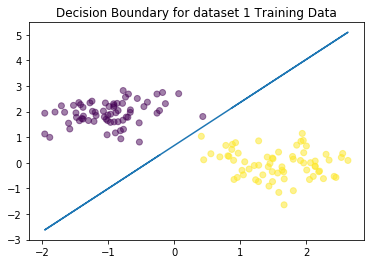

In [11]:
a1=w[1]
a2=w[2]
a0=w[0]
x1 = X_trn.T[:,1]
x2 = X_trn.T[:,2]
colors = Y_trn.T
plt.scatter(x1, x2, c=colors, alpha=0.5)

#PLOT DECISION BOUNDARY
xx=X_trn.T[:,1]
yy=(-a0-a1*x1)/a2
plt.title("Decision Boundary for dataset 1 Training Data")
plt.plot(xx, yy)

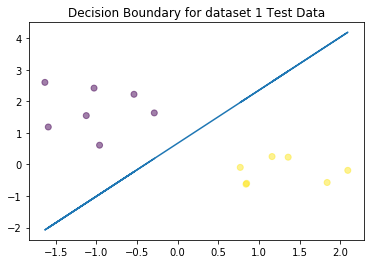

In [12]:
x1 = X_tst.T[:,1]
x2 = X_tst.T[:,2]
colors = Y_tst.T
plt.scatter(x1, x2, c=colors, alpha=0.5)

#PLOT DECISION BOUNDARY
xx=X_tst.T[:,1]
yy=(-a0-a1*x1)/a2
plt.title("Decision Boundary for dataset 1 Test Data")
plt.plot(xx, yy)

In [13]:
#for data2
mat_1 = sio.loadmat('data2.mat', squeeze_me=True)
X_trn=mat_1["X_trn"].T
X_tst=mat_1["X_tst"].T
Y_trn=mat_1["Y_trn"].T
Y_tst=mat_1["Y_tst"].T
# make x0 a zero vector feature; so that we concatenate b to w
(a,b)=X_trn.shape
ones=np.ones((1,b))
X_trn=np.concatenate((ones,X_trn),axis=0)

(c,d)=X_tst.shape
ones_tst=np.ones((1,d))
X_tst=np.concatenate((ones_tst,X_tst),axis=0)

In [14]:
d = model(X_trn, Y_trn, X_tst, Y_tst, num_iterations = 20000, learning_rate = 0.1, print_cost = True)
w=d["w"]
print("w is :",w)

train accuracy: 97.61904761904762 %
test accuracy: 100.0 %
w is : [[ 3.13180682]
 [ 6.3516107 ]
 [-1.7866731 ]]


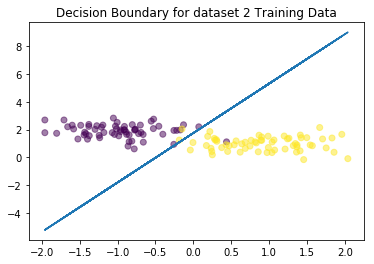

In [15]:
a1=w[1]
a2=w[2]
a0=w[0]
x1 = X_trn.T[:,1]
x2 = X_trn.T[:,2]
colors = Y_trn.T
plt.scatter(x1, x2, c=colors, alpha=0.5)

#PLOT DECISION BOUNDARY
xx=X_trn.T[:,1]
yy=(-a0-a1*x1)/a2
plt.title("Decision Boundary for dataset 2 Training Data")
plt.plot(xx, yy)

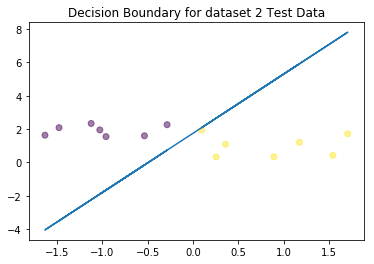

In [16]:
x1 = X_tst.T[:,1]
x2 = X_tst.T[:,2]
colors = Y_tst.T
plt.scatter(x1, x2, c=colors, alpha=0.5)

#PLOT DECISION BOUNDARY
xx=X_tst.T[:,1]
yy=(-a0-a1*x1)/a2
plt.title("Decision Boundary for dataset 2 Test Data")
plt.plot(xx, yy)

### notice for data set1 since the train data and test data are linearly seperateable we get a 0 error rate;
### for data set2, since training data is not linearly seperateable, logistic regression can not achieve 0 error, and we end up with training accuracy around 97%, while test data seems from the same distrubution but linearly seperateble and we got 0 error.

# SVM


In [5]:
# def helper functions
# error of (svm output from xi) vs (true lable yi)

def error_i(x, y, alpha, b, i):
    '''
    evaluate predict-true on ith sample
    '''
    err = 0
    for j in range(len(y)):
        err += alpha[j]*y[j, 0]*np.dot(x[i, :], x[j, :].T)
    # print(err)
    err += b - y[i, 0]

    return err


## smo idea:
### 1.Find a Lagrange multiplier alpha_1 that violates the KKT conditions for convex optimization
### 2. Pick a second multiplier alpha_2 and optimize the pair (alpha_1, alpha_2)
### 3. Repeat steps 1 and 2 until convergence.
### When all the Lagrange multipliers satisfy the KKT conditions, stop
### choose i,j based on  the cs229 paper

In [6]:

def smo(c, tol, max_passes, x_trn, y_trn):
    passes = 0   
    alphas = np.zeros(len(y_trn))  #alpha vector
    alphas_old = np.zeros(len(y_trn)) 
    #init
    b = 0
    while passes < max_passes:  
        
        num_changed_alphas = 0
        for i in range(y_trn.size):
            err_i = error_i(x_trn, y_trn, alphas, b, i)
            if (y_trn[i, 0]*err_i < -tol and alphas[i] < c) or (y_trn[i, 0]*err_i > tol and alphas[i] > 0):
                j = i
                while j == i:
                    j = random.randint(1, y_trn.size-1)   #select j!=i randomly
                err_j = error_i(x_trn, y_trn, alphas, b, j)  #compute err on new alpha_j
                alphas_old[i] = alphas[i]
                alphas_old[j] = alphas[j]
                if y_trn[i, 0] != y_trn[j, 0]:    #different side of boundaty
                    # print(alphas[j] - alphas[i])
                    l = max(0, alphas[j] - alphas[i])           #compute l from func10
                    h = min(c, c + alphas[j] - alphas[i])       #compute h from func11
                else:
                    l = max(0, alphas[i] + alphas[j] - c)
                    h = min(c, alphas[i] + alphas[j])
                if l == h:
                    continue
                eta = 2*np.dot(x_trn[i, :], x_trn[j, :].T) - np.dot(x_trn[i, :], x_trn[i, :].T) - np.dot(x_trn[j, :], x_trn[j, :].T)
                # func 14
                eta = eta[0, 0]
                if eta >= 0:
                    continue
                alphas[j] = alphas[j] - y_trn[j, 0]*(err_i - err_j)/eta  #update alpha_j
                if alphas[j] > h:
                    alphas[j] = h
                elif alphas[j] < l:
                    alphas[j] = l
                if abs(alphas[j] - alphas_old[j]) < 0.00001:
                    continue
                alphas[i] += y_trn[i, 0]*y_trn[j, 0]*(alphas_old[j] - alphas[j])  #func 16 get alpha_i from alpha_j
                b1 = b - err_i - y_trn[i, 0]*(alphas[i] - alphas_old[i])*np.dot(x_trn[i, :], x_trn[i, :].T) - y_trn[j, 0]*(alphas[j] - alphas_old[j])*np.dot(x_trn[i, :], x_trn[j, :].T)
                b2 = b - err_j - y_trn[i, 0]*(alphas[i] - alphas_old[i])*np.dot(x_trn[i, :], x_trn[j, :].T) - y_trn[j, 0]*(alphas[j] - alphas_old[j])*np.dot(x_trn[j, :], x_trn[j, :].T)
                if alphas[i] < c and alphas[i] > 0:
                    b = b1
                elif alphas[j] < c and alphas[j] > 0:
                    b = b2
                else:
                    b = (b1 + b2)/2
                num_changed_alphas += 1
                
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0
    return alphas, b


In [7]:
###evaluate misclassification count


def classification_error(x, y, w, b):
    count = 0
    for i in range(y.size):
        predicted = np.dot(x[i, :], w.T) + b
        if predicted * y[i,0] < 0:
            count+=1
    return count

## for data set 1

In [14]:
#read data change y=0 to y=-1
data = scipy.io.loadmat('data1.mat')
x_trn = np.asmatrix(data['X_trn'])
y_trn = np.asmatrix(data['Y_trn'], dtype=np.int32)
for i in range(y_trn.size):
    if y_trn[i, 0] == 0:
        y_trn[i, 0] = -1
# print(y_trn)
x_tst = np.asmatrix(data['X_tst'])
y_tst = np.asmatrix(data['Y_tst'],dtype=np.int32)
for i in range(y_tst.size):
    if y_tst[i, 0] == 0:
        y_tst[i, 0] = -1

        
#evaluate smo
c = 100
tol = 0.001
max_passes = 50


In [ ]:
alpha, b_final = smo(c, tol, max_passes, x_trn, y_trn)

In [38]:
print(alpha)
assert len(alpha) == len(y_trn)
print(b_final)

[  1.66533454e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.05311332e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.68670744e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

In [39]:

clf = svm.SVC(C=c, kernel='linear', tol=0.001)
clf.fit(x_trn, y_trn)
sk_coef = clf.coef_
sk_intercept = clf.intercept_


w_opt = np.zeros((1, x_trn.shape[1]))
for i in range(y_trn.size):
    w_opt += alpha[i]*y_trn[i, 0]*x_trn[i, :]
#
# prediction_trn = np.matmul(x_trn, w_opt.T)
# prob_trn = np.zeros(y_trn.shape)
x2 = np.zeros((x_trn.shape[0], 1))

for i in range(y_trn.size):
    x2[i, 0] = -1*(w_opt[0, 0]*x_trn[i, 0] + b_final)/w_opt[0, 1]

error = classification_error(x_trn, y_trn, w_opt, b_final)/len(y_trn)
print(error, 'error_trn_smo')

error = classification_error(x_tst, y_tst, w_opt, b_final)/len(y_tst)
print(error, 'error_tst_smo')

error = classification_error(x_trn, y_trn, sk_coef, sk_intercept)/len(y_trn)
print(error, 'error_trn_sk')

error = classification_error(x_tst, y_tst, sk_coef, sk_intercept)/len(y_tst)
print(error, 'error_tst_sk')

print("--------------------")


0.0 error_trn_smo
0.0 error_tst_smo
0.0 error_trn_sk
0.0 error_tst_sk
--------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


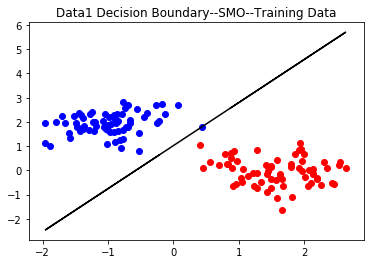

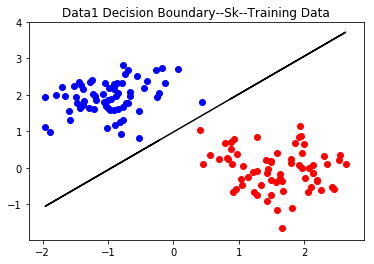

SMO_coefficients:
[[ 2.46439112 -1.38792768]] [[ 1.41727891]]
Sk_coefficients
[[ 2.77195638 -2.66807355]] [ 2.61582226]


In [43]:
for i in range(y_trn.size):
    if y_trn[i, 0] == 1:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='red')
    else:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='blue')
plt.plot(x_trn[:, 0], x2[:, 0], color='black')
plt.title("Data1 Decision Boundary--SMO--Training Data")
plt.show()


x3 = np.zeros((x_trn.shape[0], 1))
error_count = 0
for i in range(y_trn.size):
    x3[i, 0] = -1*(sk_coef[0, 0]*x_trn[i, 0] + sk_intercept)/sk_coef[0, 1]
#print(error_count, 'error')

for i in range(y_trn.size):
    if y_trn[i, 0] == 1:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='red')
    else:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='blue')
plt.plot(x_trn[:, 0], x3[:, 0], color='black')
plt.title("Data1 Decision Boundary--Sk--Training Data")
plt.show()
print("SMO_coefficients:")
print(w_opt, b_final)
print("Sk_coefficients")
print(sk_coef, sk_intercept)


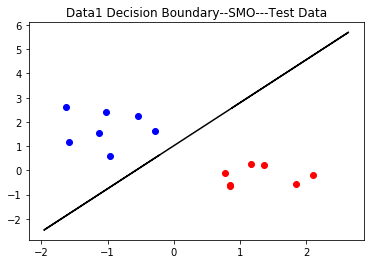

0 error


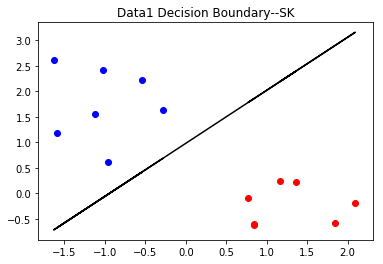

[[ 2.46439112 -1.38792768]] [[ 1.41727891]]
[[ 2.77195638 -2.66807355]] [ 2.61582226]
xxxxx


In [44]:
for i in range(y_tst.size):
    if y_tst[i, 0] == 1:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='red')
    else:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='blue')
plt.plot(x_trn[:, 0], x2[:, 0], color='black')
plt.title("Data1 Decision Boundary--SMO---Test Data")
plt.show()


x3 = np.zeros((x_tst.shape[0], 1))
error_count = 0
for i in range(y_tst.size):
    x3[i, 0] = -1*(sk_coef[0, 0]*x_tst[i, 0] + sk_intercept)/sk_coef[0, 1]
print(error_count, 'error')

for i in range(y_tst.size):
    if y_tst[i, 0] == 1:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='red')
    else:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='blue')
plt.plot(x_tst[:, 0], x3[:, 0], color='black')
plt.title("Data1 Decision Boundary--SK")
plt.show()

print(w_opt, b_final)
print(sk_coef, sk_intercept)
print("xxxxx")

In [16]:
#report error on c
tol = 0.1  
max_passes = 30
ccc=[0.0001,0.001,1,100,1000]
trn=[]
tst=[]
for c in ccc:
    alpha, b_final = smo(c, tol, max_passes, x_trn, y_trn)
    w_opt = np.zeros((1, x_trn.shape[1]))
    for i in range(y_trn.size):
        w_opt += alpha[i]*y_trn[i, 0]*x_trn[i, :]

    x2 = np.zeros((x_trn.shape[0], 1))

    for i in range(y_trn.size):
        x2[i, 0] = -1*(w_opt[0, 0]*x_trn[i, 0] + b_final)/w_opt[0, 1]
    print("C=",c)
    error = classification_error(x_trn, y_trn, w_opt, b_final)
    print(error, 'error_trn_smo')
    trn.append(error)
    error = classification_error(x_tst, y_tst, w_opt, b_final)
    print(error, 'error_tst_smo')
    tst.append(error)
    print("-------------------")
    
plt.plot(ccc, trn,x)
plt.title("trn error as a function of regularization C")
plt.show()

plt.plot(ccc, tst)
plt.title("tst error as a function of regularization C")
plt.show()

C= 0.0001
68 error_trn_smo
7 error_tst_smo
-------------------
C= 0.001
58 error_trn_smo
6 error_tst_smo
-------------------
C= 1
0 error_trn_smo
0 error_tst_smo
-------------------
C= 100
0 error_trn_smo
0 error_tst_smo
-------------------
C= 1000
0 error_trn_smo
0 error_tst_smo
-------------------


NameError: name 'plt' is not defined

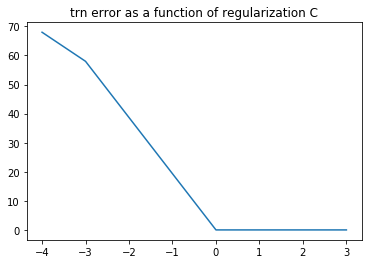

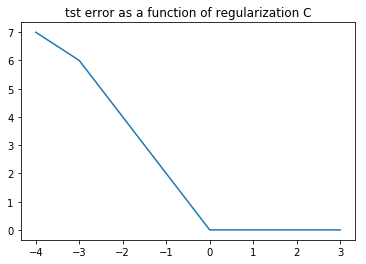

In [29]:
plt.plot([math.log10(y) for y in ccc], trn)
plt.title("trn error as a function of regularization C")
plt.show()

plt.plot([math.log10(y) for y in ccc], tst)
plt.title("tst error as a function of regularization C")
plt.show()

## Next for dataset2

In [30]:
data = scipy.io.loadmat('data2.mat')
x_trn = np.asmatrix(data['X_trn'])
y_trn = np.asmatrix(data['Y_trn'], dtype=np.int32)
for i in range(y_trn.size):
    if y_trn[i, 0] == 0:
        y_trn[i, 0] = -1
# print(y_trn)
x_tst = np.asmatrix(data['X_tst'])
y_tst = np.asmatrix(data['Y_tst'], dtype=np.int32)
for i in range(y_tst.size):
    if y_tst[i, 0] == 0:
        y_tst[i, 0] = -1
#evaluate smo
c = 100
tol = 0.001
max_passes = 80




In [48]:
alpha, b_final = smo(c, tol, max_passes, x_trn, y_trn)
print(alpha)
assert len(alpha) == len(y_trn)
print(b_final)

[  28.79746712    0.            0.            0.            0.
   10.88450766    0.          100.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.          100.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.          100.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
  100.            0.            0.            0.           93.55111109
    0.            0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.            0

In [32]:

clf = svm.SVC(C=c, kernel='linear', tol=0.001)
clf.fit(x_trn, y_trn)
sk_coef = clf.coef_
sk_intercept = clf.intercept_


w_opt = np.zeros((1, x_trn.shape[1]))
for i in range(y_trn.size):
    w_opt += alpha[i]*y_trn[i, 0]*x_trn[i, :]
#
# prediction_trn = np.matmul(x_trn, w_opt.T)
# prob_trn = np.zeros(y_trn.shape)
x2 = np.zeros((x_trn.shape[0], 1))

for i in range(y_trn.size):
    x2[i, 0] = -1*(w_opt[0, 0]*x_trn[i, 0] + b_final)/w_opt[0, 1]

error = classification_error(x_trn, y_trn, w_opt, b_final)/len(y_trn)
print(error, 'training_smo_error_rate')
print(error*len(y_trn))

error = classification_error(x_tst, y_tst, w_opt, b_final)/len(y_tst)
print(error, 'test_smo__error_rate')
print(error*len(y_tst))

error = classification_error(x_trn, y_trn, sk_coef, sk_intercept)/len(y_trn)
print(error, 'training_sk_error_rate')
print(error*len(y_trn))

error = classification_error(x_tst, y_tst, sk_coef, sk_intercept)/len(y_tst)
print(error, 'test_sk_error_rate')
print(error*len(y_tst))



0.023809523809523808 training_smo_error_rate
3.0
0.0 test_smo__error_rate
0.0
0.023809523809523808 training_sk_error_rate
3.0
0.0 test_sk_error_rate
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


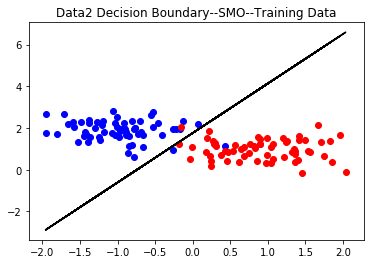

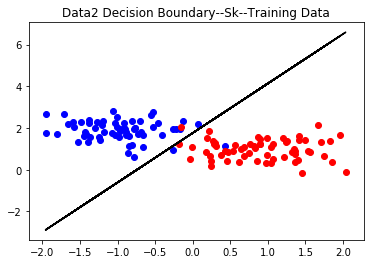

[[ 3.39429806 -1.43012619]] [[ 2.52117075]]
[[ 3.39408839 -1.42987909]] [ 2.52085526]
xxxxx


In [33]:
###  plot for dataset2 training

for i in range(y_trn.size):
    if y_trn[i, 0] == 1:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='red')
    else:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='blue')
plt.plot(x_trn[:, 0], x2[:, 0], color='black')
plt.title("Data2 Decision Boundary--SMO--Training Data")
plt.show()


x3 = np.zeros((x_trn.shape[0], 1))
error_count = 0
for i in range(y_trn.size):
    x3[i, 0] = -1*(sk_coef[0, 0]*x_trn[i, 0] + sk_intercept)/sk_coef[0, 1]
#print(error_count, 'error')

for i in range(y_trn.size):
    if y_trn[i, 0] == 1:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='red')
    else:
        plt.scatter([x_trn[i, 0]], [x_trn[i, 1]], c='blue')
plt.plot(x_trn[:, 0], x3[:, 0], color='black')
plt.title("Data2 Decision Boundary--Sk--Training Data")
plt.show()

print(w_opt, b_final)
print(sk_coef, sk_intercept)
print("xxxxx")

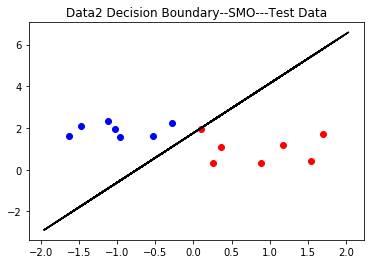

0 error


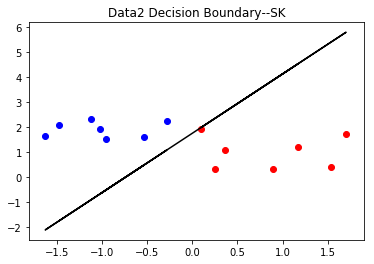

[[ 3.39429806 -1.43012619]] [[ 2.52117075]]
[[ 3.39408839 -1.42987909]] [ 2.52085526]
xxxxx


In [31]:
## plot for dataset2 tst

for i in range(y_tst.size):
    if y_tst[i, 0] == 1:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='red')
    else:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='blue')
plt.plot(x_trn[:, 0], x2[:, 0], color='black')
plt.title("Data2 Decision Boundary--SMO---Test Data")
plt.show()


x3 = np.zeros((x_tst.shape[0], 1))
error_count = 0
for i in range(y_tst.size):
    x3[i, 0] = -1*(sk_coef[0, 0]*x_tst[i, 0] + sk_intercept)/sk_coef[0, 1]
print(error_count, 'error')

for i in range(y_tst.size):
    if y_tst[i, 0] == 1:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='red')
    else:
        plt.scatter([x_tst[i, 0]], [x_tst[i, 1]], c='blue')
plt.plot(x_tst[:, 0], x3[:, 0], color='black')
plt.title("Data2 Decision Boundary--SK")
plt.show()

print(w_opt, b_final)
print(sk_coef, sk_intercept)
print("xxxxx")

In [34]:
#report error on c
tol = 0.1
max_passes = 20
ccc=[0.00001,0.001,1,100,1000]
trn=[]
tst=[]
for c in ccc:
    alpha, b_final = smo(c, tol, max_passes, x_trn, y_trn)
    w_opt = np.zeros((1, x_trn.shape[1]))
    for i in range(y_trn.size):
        w_opt += alpha[i]*y_trn[i, 0]*x_trn[i, :]

    x2 = np.zeros((x_trn.shape[0], 1))

    for i in range(y_trn.size):
        x2[i, 0] = -1*(w_opt[0, 0]*x_trn[i, 0] + b_final)/w_opt[0, 1]
    print("C=",c)
    error = classification_error(x_trn, y_trn, w_opt, b_final)
    print(error, 'misclassification_trn_smo')
    trn.append(error)
    error = classification_error(x_tst, y_tst, w_opt, b_final)
    print(error, 'misclassification_tst_smo')
    tst.append(error)
    print("-------------------")

C= 1e-05
63 misclassification_trn_smo
7 misclassification_tst_smo
-------------------
C= 0.001
12 misclassification_trn_smo
1 misclassification_tst_smo
-------------------
C= 1
3 misclassification_trn_smo
1 misclassification_tst_smo
-------------------
C= 100
3 misclassification_trn_smo
0 misclassification_tst_smo
-------------------


KeyboardInterrupt: 

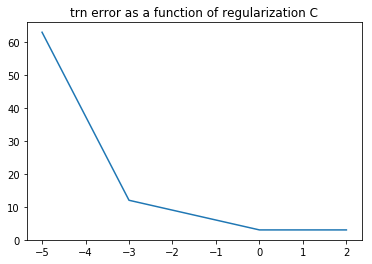

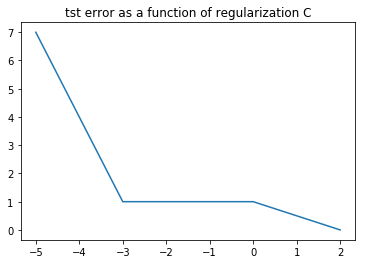

In [39]:
ccc=[0.00001,0.001,1,100]
plt.plot([math.log10(y) for y in ccc], trn)
plt.title("trn error as a function of regularization C")
plt.show()

plt.plot([math.log10(y) for y in ccc], tst)
plt.title("tst error as a function of regularization C")
plt.show()

### The parameter C(regularization term) basically set the importance of a miss-classification.
### by this i mean, for small C the margin(regarding hyperplane) is large while for large C the margin is small, so...
### intuitively, as C grows larger they less the wrongly classified examples are allowed . Then when c tends to infinite the solution tends to the hard-margin (allow no miss-classification). 

### When C is small (go to 0), this means more the miss-classifications are allowed, which is excatly we see in dataset1 and dataset2

### and for dataset2 which is not linearly seperable, in order to find a solution, the miss-classification constraint must be relaxed, and this means C cannot go to very large.